# Data explore

In [1]:
import pandas as pd
from data import parquet

dfData = parquet.read("./data/Carrickallen.parquet")
dfData.head()

,turbineid,datetime,avgwindspeed,avgpower,windspeedstandarddeviation,nacelleposition,avgwinddirection,availablepowerpublished,avgrotorspeed,avgpitchangle,...,rotordiameter,hubheight,groundlevelaltitude,dateinstalled,turbulent,underperformanceprobability,overperformanceprobability,turbulentvalid,underperformanceprobabilityvalid,overperformanceprobabilityvalid
0,CRKALN_001,2019-01-01 00:00:00,8.16,1180.48,20.160000,247.59,241.66,1042.36,14.51,0.09,...,92,74,44,2018-10-01,False,NaN,NaN,True,True,True
1,CRKALN_001,2019-01-01 00:10:00,7.41,919.05,20.480000,247.59,245.49,781.94,13.79,0.00,...,92,74,44,2018-10-01,False,NaN,NaN,True,True,True
2,CRKALN_001,2019-01-01 00:20:00,6.87,753.19,19.040001,247.59,245.45,611.98,13.07,0.00,...,92,74,44,2018-10-01,False,NaN,NaN,True,True,True
3,CRKALN_001,2019-01-01 00:30:00,7.27,909.52,15.360000,247.59,244.50,735.18,13.74,0.02,...,92,74,44,2018-10-01,False,NaN,NaN,True,True,True
4,CRKALN_001,2019-01-01 00:40:00,7.64,1040.67,17.920000,247.59,247.77,858.76,14.38,0.00,...,92,74,44,2018-10-01,False,NaN,NaN,True,True,True


In [2]:
for col in dfData.columns:
    print(col)
    print(dfData[col].describe())
    print("-"*50)

turbineid
count        2903497
unique            10
top       CRKALN_009
freq          290822
Name: turbineid, dtype: object
--------------------------------------------------
datetime
count                          2903497
mean     2021-11-15 15:00:51.818890240
min                2019-01-01 00:00:00
25%                2020-07-03 07:20:00
50%                2021-11-21 14:40:00
75%                2023-04-15 09:10:00
max                2024-08-31 23:50:00
Name: datetime, dtype: object
--------------------------------------------------
avgwindspeed
count    2.903356e+06
mean     6.556407e+00
std      3.204783e+00
min     -6.390000e+00
25%      4.310000e+00
50%      6.100000e+00
75%      8.350000e+00
max      3.963000e+01
Name: avgwindspeed, dtype: float64
--------------------------------------------------
avgpower
count    2.903497e+06
mean     6.612706e+02
std      6.319273e+02
min     -1.862000e+01
25%      1.311200e+02
50%      4.401600e+02
75%      1.083020e+03
max      2.061000e+03
N

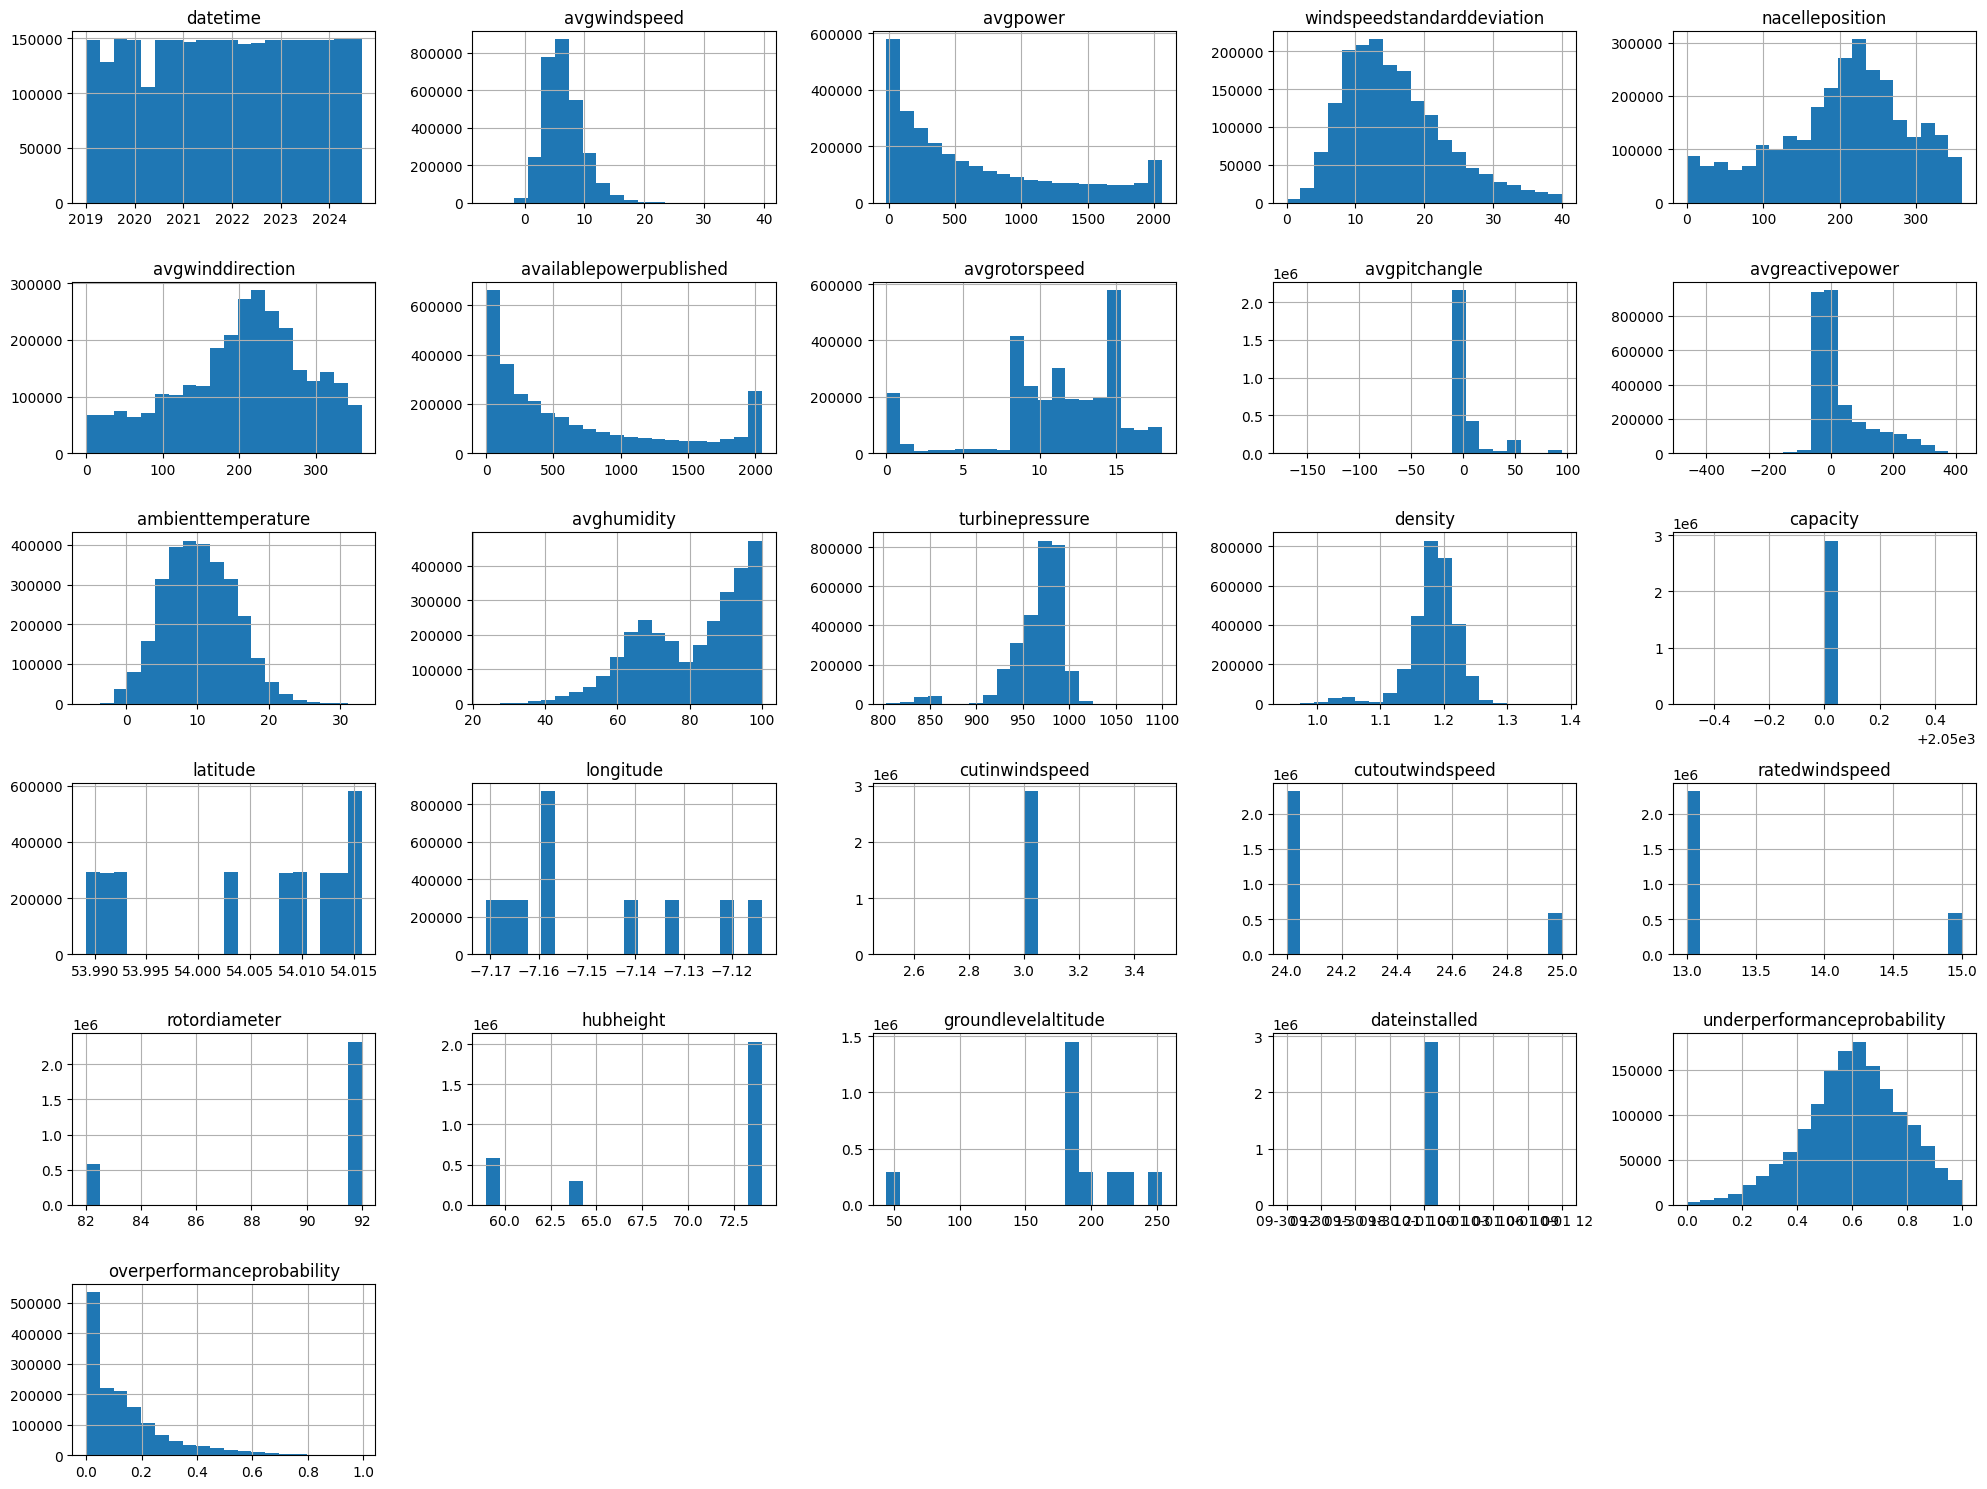

In [3]:
# plot hist for each column
def plotHist(dataDf):
    from matplotlib import pyplot as plt


    dataDf.hist(bins=20, figsize=(20,15), sharex=False, sharey=False)

    plt.tight_layout()
    plt.show()
    
plotHist(dfData)

## Trash Columns 

1. Prod_LatestAvg_ActPwrGen2: all values are zeros
1. Prod_LatestAvg_ReactPwrGen2: all values are zeros
1. Grd_Prod_Freq_Avg: values are in 50 +- 0.1
1. Prod_LatestAvg_ReactPwrGen0 & Prod_LatestAvg_ActPwrGen0: 50% and 75% = 0


## Suspicious Columns

1. Amb_WindSpeed_Std: Most of its value is in range [0, 10%]
1. Amb_WindDir_Relative_Avg: 25-75 is in much smaller range than min-max
1. Gen_RPM_Min & Gen_RPM_Avg: 25% is much smaller than the rest. Maybe 0 for missing
1. Prod_LatestAvg_ReactPwrGen1: value range is not normal, and its neighbors (Prod_LatestAvg_ReactPwrGen0, Prod_LatestAvg_ReactPwrGen2) is identified as trash
1. Prod_LatestAvg_TotActPwr: Most of its value is in range [0, 10%]
1. 

## Other
Some prod columns contain negative values



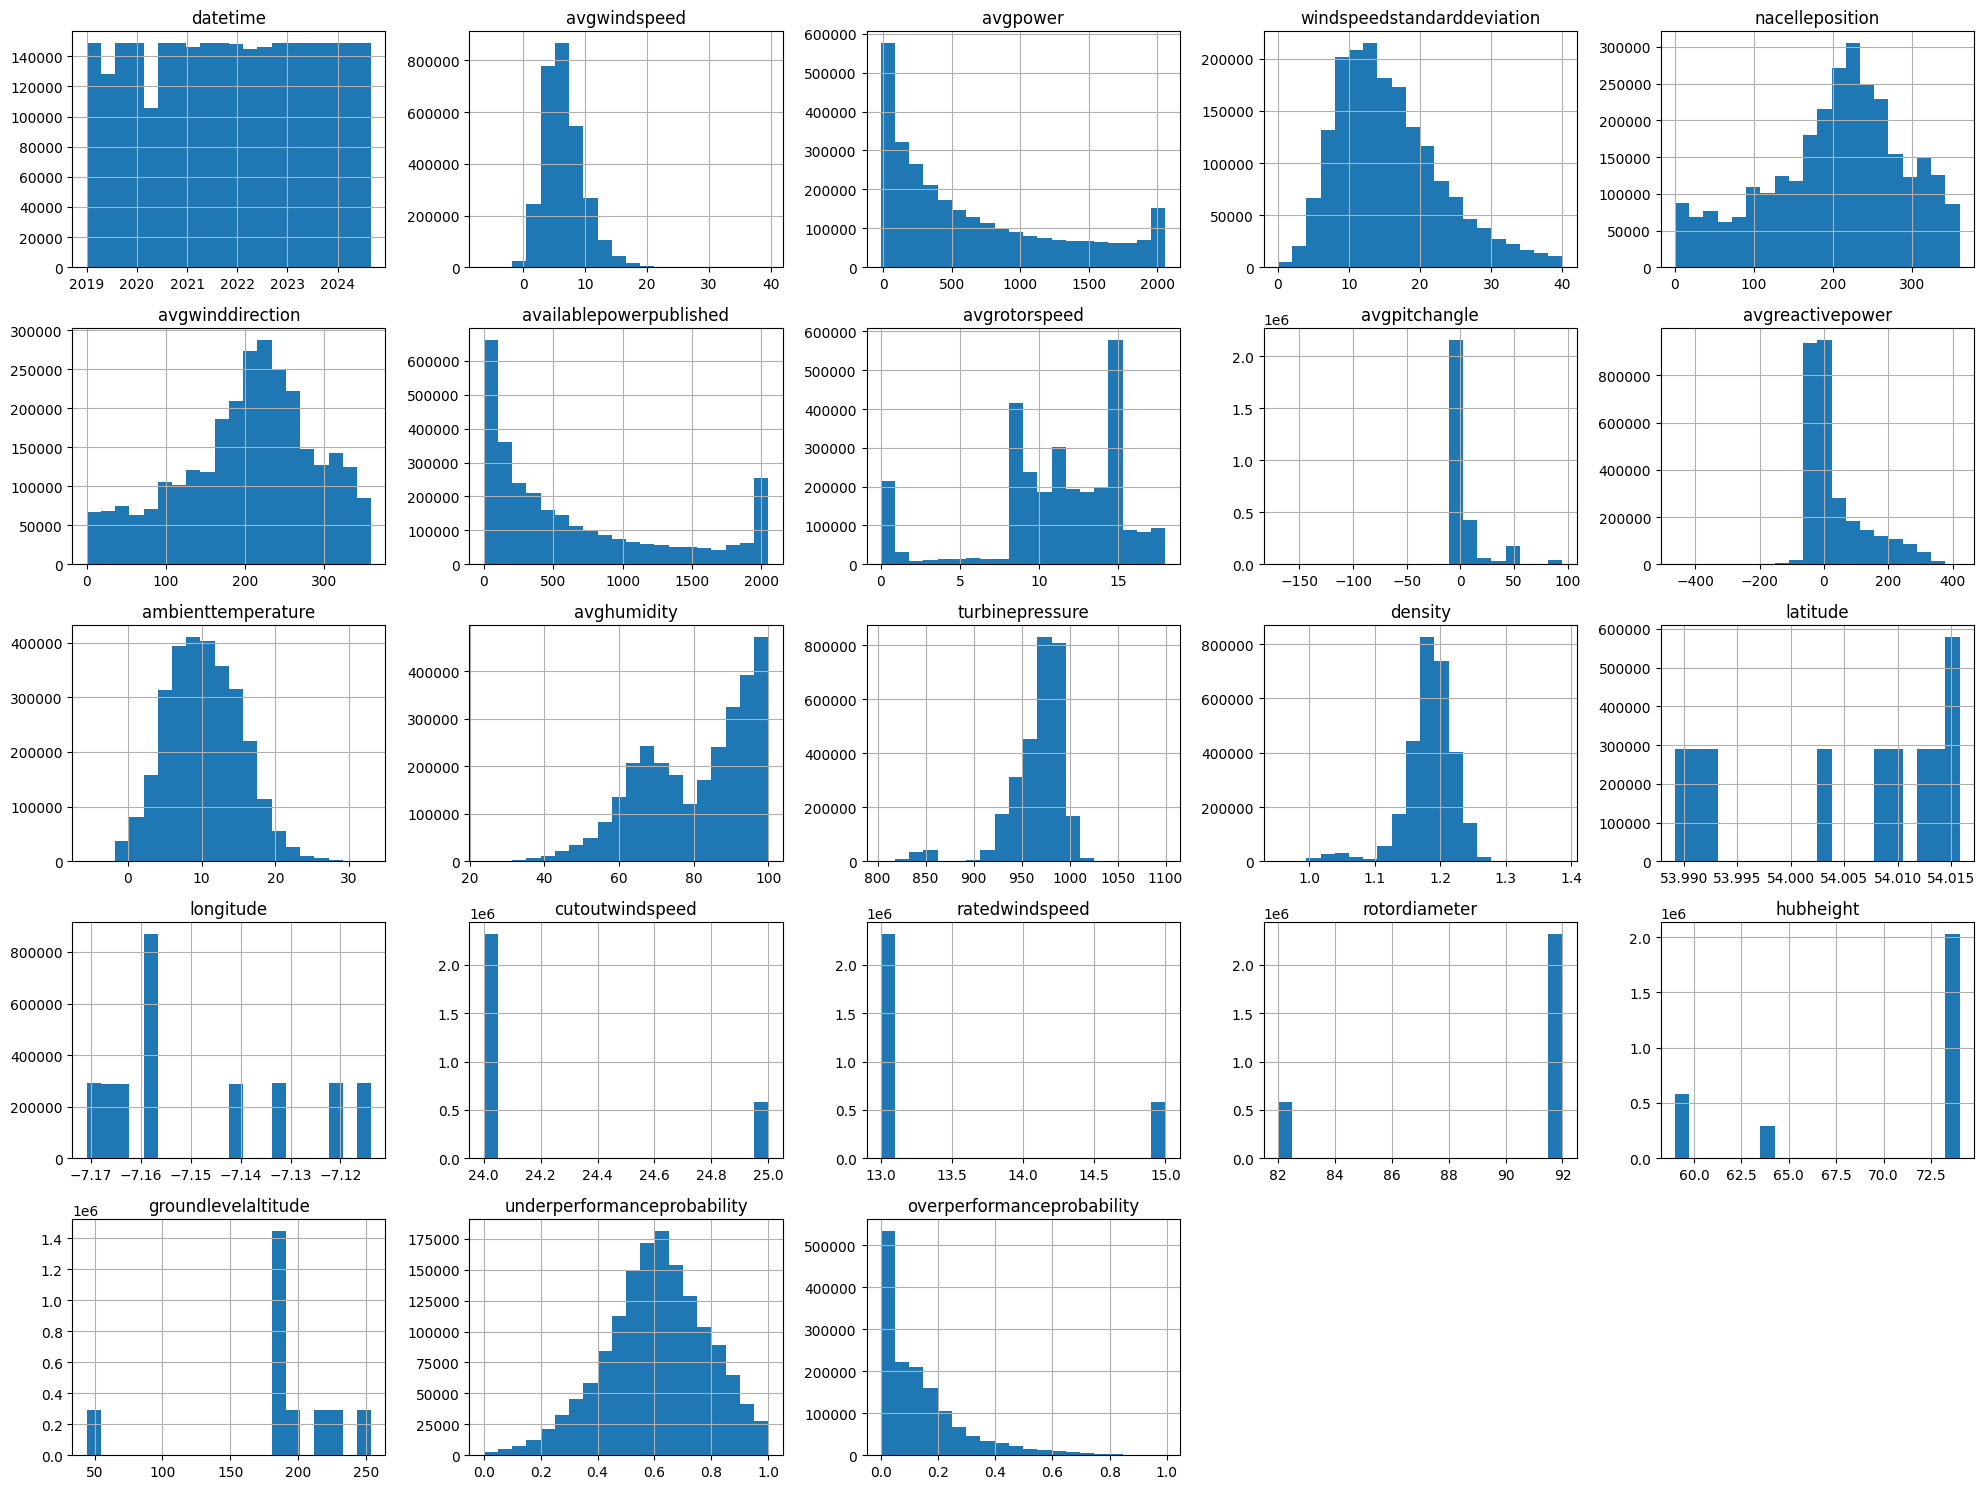

In [11]:
dfCleared = dfData[[col for col in dfData.columns if col not in [
    "capacity",
    "cutinwindspeed",
    "dateinstalled",
]]]

plotHist(dfCleared)
                   

# Power curve

In [12]:
# columns containing the word "Wind"
windCols = [col for col in dfData.columns if "wind" in col]

print(len(windCols))
windCols

6


['avgwindspeed',
 'windspeedstandarddeviation',
 'avgwinddirection',
 'cutinwindspeed',
 'cutoutwindspeed',
 'ratedwindspeed']

In [14]:
pwrCols = [col for col in dfData.columns if "power" in col.lower()]

print(len(pwrCols))
pwrCols

3


['avgpower', 'availablepowerpublished', 'avgreactivepower']

In [43]:
from matplotlib import pyplot as plt


pwrCol = "avgpower"
windCol = "avgwindspeed"


def plotEnergyByWind(dataDf, output=None):
    dfSortedByWind = dataDf.sort_values(windCol)

    # draw an energy production curve
    plt.figure(figsize=(10, 6))
    plt.plot(dfSortedByWind[windCol], dfSortedByWind[pwrCol], ".")
    
    plt.xlim(0, 22)
    plt.ylim(-100, 2200)

    plt.title("Energy Production Curve", fontsize=14)
    plt.xlabel("Wind Speed", fontsize=12)
    plt.ylabel("Power Production", fontsize=12)

    if output:
        plt.savefig(output)
        plt.close()
    else:
        plt.show()

In [17]:
turbineIdx = dfData["turbineid"].unique()
turbineIdx

['CRKALN_001', 'CRKALN_002', 'CRKALN_003', 'CRKALN_004', 'CRKALN_005', 'CRKALN_006', 'CRKALN_007', 'CRKALN_008', 'CRKALN_009', 'CRKALN_010']
Categories (10, object): ['CRKALN_001', 'CRKALN_002', 'CRKALN_003', 'CRKALN_004', ..., 'CRKALN_007', 'CRKALN_008', 'CRKALN_009', 'CRKALN_010']

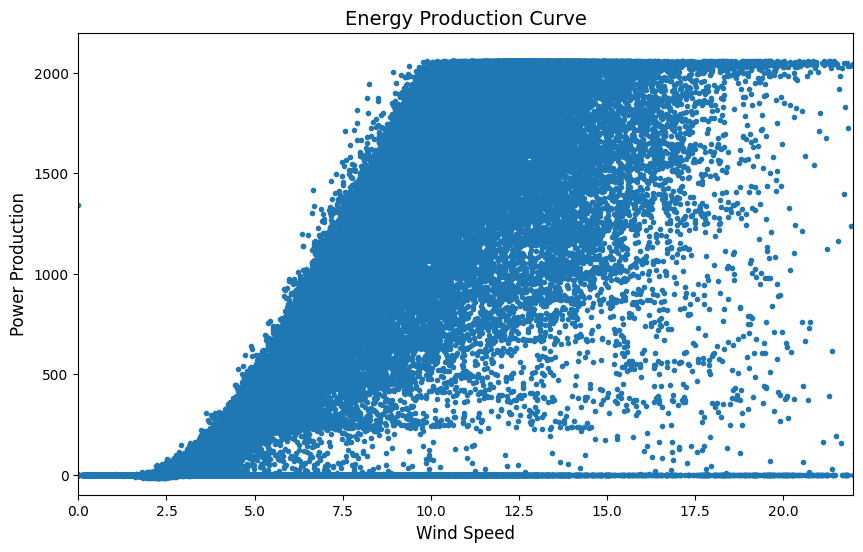

In [38]:
dfTurbine = dfData[dfData["turbineid"] == "CRKALN_001"]
plotEnergyByWind(dfTurbine)

In [44]:
from pathlib import Path


dfTurbine1 = dfData[dfData["turbineid"] == turbineIdx[0]]
dfTurbine1["datetime"] = pd.to_datetime(dfTurbine1["datetime"])

# seperate into smaller df by time, 6 months
min = dfTurbine1["datetime"].min()
max = dfTurbine1["datetime"].max()

interval = pd.date_range(min, max, freq="1ME").append(pd.DatetimeIndex([max]))

Path("./output").mkdir(exist_ok=True)
for i in range(len(interval)-1):
    df = dfTurbine1[(dfTurbine1["datetime"] >= interval[i]) & (dfTurbine1["datetime"] < interval[i+1])]
    plotEnergyByWind(df, f"./output/energy_curve_turbine1_{interval[i]}.svg")

/tmp/ipykernel_196295/3108651005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTurbine1["datetime"] = pd.to_datetime(dfTurbine1["datetime"])
